# Ансаблевые методы (Заданий 1)
В данном упражнении вам предстоит решить уже знакомую задачу классификации изображений – отделить изображения кошек от изображений собак, используя ансамбль моделей на основе стекинга.

В предложенном архиве находится выборка, включающая в себя изображения кошек и собак (по 500 изображений). Имя каждого изображения, для удобства, имеет следующий формат: cat/dog.номер_изображения.jpg в зависимости от того, какое животное присутствует на изображении. Данная выборка используется для обучения классификатора и его оценки.

Следующая выборка предназначена для классификации новых объектов после построения классификатора.

1. Обучите базовые алгоритмы на исходном наборе данных (предварительно закодируйте классы: Cat — 1, Dog — 0):

* Классификатор с мягким зазором и параметрами:
**C = 1.92**, **random_state = 92**, остальные параметры по умолчанию;

* Бэггинг деревьев принятия решений. Параметры дерева: **criterion = 'entropy'**, **min_samples_leaf = 10**, **max_leaf_nodes = 20**, **random_state = 92**, остальные параметры по умолчанию. Параметры бэггинга: **n_estimators = 20**, **random_state = 92**;
* Случайный лес с параметрами: **n_estimators = 20**, **criterion = 'entropy'**, **min_samples_leaf = 10**, **max_leaf_nodes = 20**, **random_state = 92**, остальные параметры по умолчанию.
2. Обучите метаалгоритм — логистическая регрессия: **solver='lbfgs'**, **random_state = 92**, остальные параметры по умолчанию. Оцените его точность при **cv = 2**.

3. Обучите модель стэкинга. Используйте 2-fold (cv = 2) кросс-валидацию для оценки.

* Введите долю правильной классификации (Accuracy):





4. Выполните предсказание для изображений, указанных ниже:

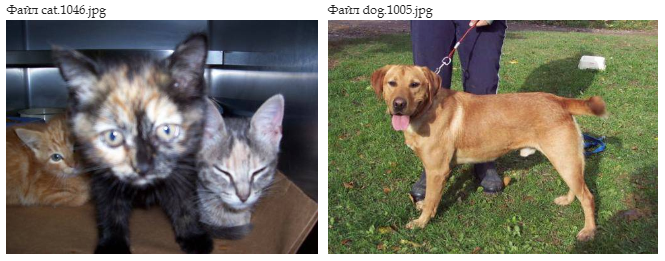

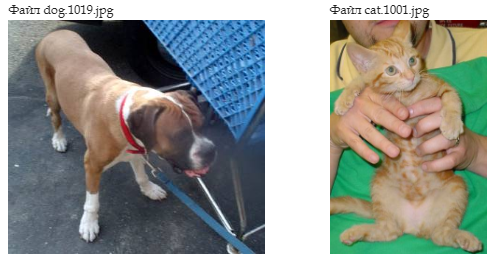

In [13]:
import cv2
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from imutils import paths

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score

def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/train')))
data = []

for imagePath in imagePaths:
  image_hist = list(extract_histogram(cv2.imread(imagePath)))
  if "/cat." in imagePath:
    image_hist.append(1)
  else:
    image_hist.append(0)
  data.append(np.array(image_hist))

df = pd.DataFrame(data, columns=[str(i) for i in range(len(data[0]))])
df.rename(columns={'512': 'y'}, inplace=True)

X = df.loc[:, '0':'511']
y = df.loc[:, 'y']

linear_svc = LinearSVC(C = 1.92, random_state = 92)
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 92), n_estimators = 20, random_state = 92)
random_forest = RandomForestClassifier(n_estimators = 19, criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 92)

final_estimator = LogisticRegression(solver='lbfgs', random_state = 92)

estimators = [('linear_svc', linear_svc),
              ('bagging_clf', bagging_clf),
              ('random_forest', random_forest)]
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=2)
clf.fit(X, y)

y_pred = clf.predict(X)
print('Доля правильной классификации =', np.round(accuracy_score(y, y_pred), 2))

imageTests = sorted(list(paths.list_images('/content/drive/MyDrive/test')))

for imageTest in imageTests:
  if 'cat.1046.jpg' in imageTest:
    dog_1023 = extract_histogram(cv2.imread(imageTest))
  if 'dog.1005.jpg' in imageTest:
    dog_1029 = extract_histogram(cv2.imread(imageTest))
  if 'dog.1019.jpg' in imageTest:
    dog_1006 = extract_histogram(cv2.imread(imageTest))
  if 'cat.1001.jpg' in imageTest:
    cat_1004 = extract_histogram(cv2.imread(imageTest))

print('Вероятность отнесения изображения cat.1046.jpg к классу 1:', np.round(*clf.predict_proba(dog_1023.reshape(1, -1)), 3)[1])
print('Вероятность отнесения изображения dog.1005.jpg к классу 1:',np.round(*clf.predict_proba(dog_1029.reshape(1, -1)), 3)[1])
print('Вероятность отнесения изображения dog.1019.jpg к классу 1:',np.round(*clf.predict_proba(dog_1006.reshape(1, -1)), 3)[1])
print('Вероятность отнесения изображения cat.1001.jpg к классу 1:',np.round(*clf.predict_proba(cat_1004.reshape(1, -1)), 3)[1])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Доля правильной классификации = 0.84
Вероятность отнесения изображения cat.1046.jpg к классу 1: 0.432
Вероятность отнесения изображения dog.1005.jpg к классу 1: 0.095
Вероятность отнесения изображения dog.1019.jpg к классу 1: 0.278
Вероятность отнесения изображения cat.1001.jpg к классу 1: 0.266


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, 